## 邏輯回歸(Logistic Regression)
[參考網站](https://github.com/andy6804tw/2021-13th-ironman/tree/main/9.%E9%82%8F%E8%BC%AF%E8%BF%B4%E6%AD%B8)

邏輯迴歸 (Logistic Regression) 是由線性迴歸變化而來的，它是一種<font color = red>分類的模型</font>。其目標是要找出一條直線能夠將所有數據清楚地分開並做分類，我們又可以稱迴歸的線性分類器。邏輯迴歸其實是在說明一個機率的意義，透過一個 function 去訓練得到的一組參數，不同的 w,b 就會得到不同的 function。於是我們可以說 $f_{w,b}(x)$ 即為 posterior probability (事後機率)。\


#### 線性迴歸與邏輯迴歸
邏輯迴歸是用來處理分類問題，目標是找到一條直線可以將資料做分類。主要是利用 sigmoid function 將輸出轉換成 0~1 的值，表示可能為這個類別的機率值。而線性迴歸是用來預測一個連續的值，目標是想找一條直線可以逼近真實的資料。\
<img src="https://miro.medium.com/max/720/0*eMgJSdCcerlh__Ip.png" width="50%" height="50%">\
[圖片參考網址](https://medium.com/analytics-vidhya/logistic-regression-using-python-a5044843a504)


#### 邏輯迴歸學習機制
邏輯迴歸是一個最基本的二元線性分類器(當然它並不是只能當二元分類器)。我們要找一個機率 (posterior probability)，當機率 P(C1|x) 大於 0.5 時則輸出預測 Class 1，反之機率小於 0.5 則輸出 Class 2。如果我們假設資料是 Gaussian 機率分佈，我們可以說這個 posterior probability 就是 𝜎(𝑧)。其中 z=w*x+b，x 為輸入特徵，而 w 與 b 分別為權重(weight)與偏權值(bias) 他們是透過訓練得到的一組參數。\
以下就是一個邏輯迴歸的運作機制，如果以圖像化表示會長這樣。我們的 function 會有兩組參數，一組是 w 我們稱為 weight，另一個常數 b 稱為 bias。假設我們有兩個輸入特徵，並將這兩個輸入分別乘上 w 再加上 b 就可以得到 z，然後通過一個 sigmoid function 得到的輸出就是 posterior probability。\
<img src="https://raw.githubusercontent.com/andy6804tw/2021-13th-ironman/main/9.%E9%82%8F%E8%BC%AF%E8%BF%B4%E6%AD%B8/image/img9-4.png" width="50%" height="50%">


在邏輯迴歸中我們定義的損失函數是要去最小化的對象是所有訓練資料 cross entropy 的總和。我們希望模型的輸出要跟目標答案要越接近越好。因此我們可以將最小化的目標寫成一個函數：\
<img src="https://raw.githubusercontent.com/andy6804tw/2021-13th-ironman/main/9.%E9%82%8F%E8%BC%AF%E8%BF%B4%E6%AD%B8/image/img9-5.png" width="50%" height="50%">

最後是尋找一組最好的參數，使得 loss 能夠最低。因此這裡採用梯度下降 (Gradient Descent) 來最小化交叉熵 (Cross Entropy)。我們將損失函數對權重求偏導後，可以得到下面的權重更新的式子：\
<img src="https://raw.githubusercontent.com/andy6804tw/2021-13th-ironman/main/9.%E9%82%8F%E8%BC%AF%E8%BF%B4%E6%AD%B8/image/img9-6.png" width="50%" height="50%">

#### 多元分類邏輯迴歸 (Multinomial Logistic Regression)
在 Sklearn 中也能使用邏輯迴歸分類器應用在多類別的分類問題上，對於多元邏輯迴歸有 one-vs-rest(OvR, 一對多) 和 many-vs-many(MvM) 兩種方法。兩者的做法都是將所有類別的資料依序作二元分類訓練。MvM 相較於 OvR 比較精準，但 liblinear 只支援 OvR。

*   one-vs-rest(OvR): 訓練時把某個類別的資料歸為一類，其他剩餘的資料歸為另一類做邏輯迴歸，因此若有 k 個類別的資料會有 k 個二元分類器。假如有三個類別 A、B、C，首先抽取 A 類別的資料做為正集，B、C 類別資料做為負集; B 類別的資料作為正集，A、C 類別類別資料做為負集; C 類別的資料作為正集，A、B 類別類別資料做為負集。透過這三組訓練集分別進行訓練，然後的得到三個分類器 f1(x)、f2(x)、f3(x)。預測的時候就是把資料丟進三個分類器，查看哪個分類器預測的分數最高就決定該類別。
*   many-vs-many(MvM): 與 OvR 差別在於訓練時每次只會挑兩個類別訓練一個分類器，因此 k 個類別的資料就需要 k(k-1)/2 個二元分類器。假如有三個類別 A、B、C，因此我們會有三組二元分類器分別有 (A、B)、(A、C) 與 (B、C)。訓練完成後當有新資料要預測時，把資料分別對三個二元分類器進行預測，最終多數決的方式得到預測結果。

### 程式實作

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


#### 切割訓練和測試集

In [4]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #test要30%，且按照ｙ的比例去切

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


#### 建立 Logistic regression 模型
邏輯迴歸是由線性回歸變化而來的，屬判別模型適合解決二元分類問題。

Parameters:

*   penalty: 正規化l1/l2，防止模型過度擬合。
*   C: 數值越大對 weight 的控制力越弱，預設為1。
*   n_init: 預設為10次隨機初始化，選擇效果最好的一種來作為模型。
*   solver: 優化器的選擇。newton-cg,lbfgs,liblinear,sag,saga。預設為liblinear。
    1.  liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
    2.  bfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
    3.  newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
    4.  sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。
    5.  [參考網站](https://blog.csdn.net/lc574260570/article/details/82116197)
*   multi_class: 選擇分類方式，ovr就是one-vs-rest(OvR)，而multinomial就是many-vs-many(MvM)。預設為 auto，故模型訓練中會取一個最好的結果。
*   max_iter: 迭代次數，預設為100代。
*   class_weight: 若遇資料不平衡問題可以設定balance，預設=None。
*   random_state: 亂數種子僅在solver=sag/liblinear時有用。

Attributes:

*   coef_: 取得斜率。
*   intercept_: 取得截距。

Methods:

*   fit: 放入X、y進行模型擬合。
*   predict: 預測並回傳預測類別。
*   predict_proba: 預測每個類別的機率值。
*   score: 預測成功的比例。

In [5]:
from sklearn.linear_model import LogisticRegression

# 建立Logistic模型
logisticModel = LogisticRegression(multi_class='auto', solver='newton-cg',random_state=0)
# 使用訓練資料訓練模型
logisticModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = logisticModel.predict(X_train)

#### 使用Score評估模型

In [6]:
# 預測成功的比例
print('訓練集: ',logisticModel.score(X_train,y_train))
print('測試集: ',logisticModel.score(X_test,y_test))

訓練集:  0.9714285714285714
測試集:  0.9333333333333333


#### 真實分類

In [7]:
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
df_test['Species'] = y_test
pred = logisticModel.predict(X_test)
df_test['Predict'] = pred

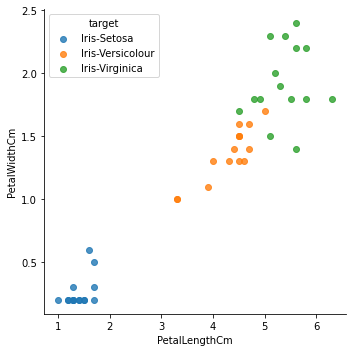

In [8]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", hue='Species', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

#### Logistic regression (訓練集)預測結果

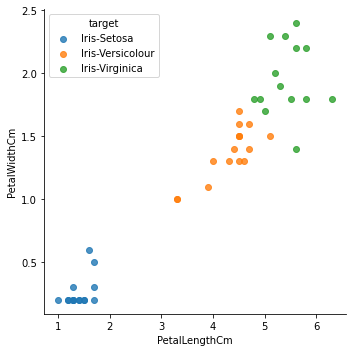

In [9]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=df_test, hue="Predict", fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

## [補充] Limitation of Logistic Regression
Logistic 其實有很大的限制，如下圖範例在線性不可分的時候無法有效預測。我們可以發現無法一刀可以將這四筆資料分成兩個類別。

圖片參考 - 台大李宏毅教授-機械學習課程

<img src="https://camo.githubusercontent.com/5cb884a5b01ec5befc1cee831638cdf55d4d4eba5e0f15971d86e8ea0014a2b3/68747470733a2f2f692e696d6775722e636f6d2f3150486e32586a2e706e67" width="40%" height="40%">

因為在剛剛的計算方法 Logistic Regression 在兩個類別中僅會切出一條直線。以上例來看不管怎麼分割，始終無法將資料分離出來。\
<img src="https://camo.githubusercontent.com/6ab1dac19097ac84c4c231bc72ab478a01d27dda9abeb197e0c08fc47b515d86/68747470733a2f2f692e696d6775722e636f6d2f744f636b6b65492e706e67" width="40%" height="40%">\


In [10]:
from sklearn.linear_model import LogisticRegression

X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=[1,0,0,1]

# 建立Logistic模型
logisticModel = LogisticRegression(random_state=0)
# 使用訓練資料訓練模型
logisticModel.fit(X, y)
# 使用訓練資料預測分類
logisticModel.predict(X)

array([0, 0, 0, 0])

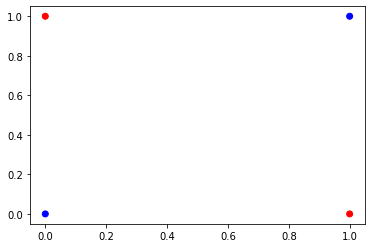

In [11]:
color = "rb"
color = [color[y[i]] for i in range(len(y))]
plt.scatter(X[:,0],X[:,1],c=color)

C:\Users\bluesky\AppData\Local\Temp\ipykernel_14280\1212063287.py:53: RuntimeWarning: invalid value encountered in double_scalars
  return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]


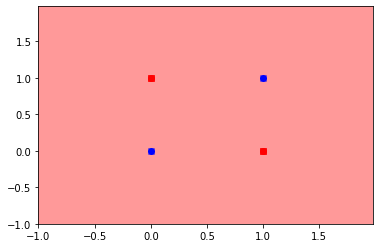

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# 決策邊界函式
def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
	# setup marker generator and color map
	markers = ('s','x','o','^','v')
	colors = ('red','blue','lightgreen','gray','cyan')
	cmap = ListedColormap(colors[:len(np.unique(y))])

	# plot the decision surface
	x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
	x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

	xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
							np.arange(x2_min,x2_max,resolution))

	Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

	Z = Z.reshape(xx1.shape)

	plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
	plt.xlim(xx1.min(),xx1.max())
	plt.ylim(xx2.min(),xx2.max())

	for idx, cl in enumerate(np.unique(y)):
		plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
			alpha=0.8, c=[cmap(idx)], marker=markers[idx],label=cl)
	if test_idx:
		X_test, y_test = X[test_idx,:], y[test_idx]
		plt.scatter(X_test[:, 0], X_test[:,1], c='',
			alpha=1.0, linewidth=1, marker='o',
			s=55, label='test set')

# 繪製決策邊界
plt.figure()
plot_decision_regions(X,y,logisticModel)
# Plot also the training points
colors = "rb"
for i, color in zip(logisticModel.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = logisticModel.coef_
intercept = logisticModel.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
              ls="--", color=color)

plot_hyperplane(0, 'r')

plt.show()